In [23]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle
from skimage.transform import resize
from skimage import io
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.model_selection import train_test_split
import skimage.transform as transform

In [24]:
DIRECTORY = 'F:\Pokemon Cards Data set'

CATEGORIES = ["orignal"] 

In [29]:
import pytesseract
import cv2
import re
from skimage import color

def detect_text(img_arr):
    # Use Tesseract to extract text from the image
    text = pytesseract.image_to_string(img_arr, config='--psm 11')

    # Check the HP and attack values
    hp_match = re.search(r'^(\d+)\s+HP', text)
    attack_match = re.search(r'^(.+)\s(\d+)', text)
    if hp_match and attack_match:
        hp = int(hp_match.group(1))
        attack_no = int(attack_match.group(2))
        if hp > 300 or attack_no == 0 or attack_match.group(1).startswith(str(attack_no)):
            return False

    # Check the font size and style
    font_size = re.search(r'\d+px', text)
    font_style = re.search(r'font-family:\s*(.*?);', text, flags=re.IGNORECASE)
    if font_size and font_style:
        if int(font_size.group(0).strip('px')) < 30 or 'bold' not in font_style.group(1).lower():
            return False

    # Check the spelling of Pokemon names and attack names
    pokemon_name = re.search(r'^(.*)\n\n\s+(basic|stage \d)', text)
    if pokemon_name:
        pokemon_name = pokemon_name.group(1).strip()
        if any(char.isdigit() for char in pokemon_name):
            return False
        if 'é' not in pokemon_name:
            return False
    else:
        return False

    attack_names = re.findall(r'\n\n(.+)\n', text)
    if attack_names:
        for name in attack_names:
            if any(char.isdigit() for char in name):
                return False
            if 'é' not in name:
                return False
    else:
        return False

    return True

import numpy as np
import os
import skimage.io as io
import cv2
import matplotlib.pyplot as plt

data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    if not os.path.isdir(folder):
        print(f"Error: Directory not found: {folder}")
        continue
    
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        if not img.endswith(('.jpg', '.jpeg', '.png')):
            # skip non-image files
            continue
        try:
            img_arr = io.imread(img_path)
        except:
            # handle the case where the image cannot be read
            print(f"Error reading image file: {img_path}")
            continue
        
        try:
            img_arr = cv2.resize(img_arr, (342, 245))
            if img_arr.shape[:2] != (245, 342):
                # skip images with invalid shape
                print(f"Error: Invalid image shape: {img_path}")
                continue
            img_arr = cv2.cvtColor(img_arr, cv2.COLOR_RGBA2RGB)
            img_arr = img_arr.astype(float) / 255.0
            # Call detect_text function here
            if detect_text(img_arr):
                image = np.array(img_arr).flatten()
                data.append([image, label])      
        except Exception as e:
            print(f"Error processing image file: {img_path}")
            print(e)

if len(data) == 0:
    print("No data found. Please check the directory and file formats.")
else:
    # Shuffle the data list
    np.random.shuffle(data)

    # Plot the images
    num_images = min(len(data), 9)  # Adjust the number of images to display
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
    for i, ax in enumerate(axes.flatten()):
        if i < num_images:
            img = data[i][0].reshape(245, 342, 3)  # Reshape to the original image shape
            ax.imshow(img)
            ax.set_title(CATEGORIES[data[i][1]])
        else:
            ax.axis("off")  # Disable empty subplot
    plt.show()

Error processing image file: F:\Pokemon Cards Data set\orignal\Aarons Collection_88_pl2.jpg
Cannot handle this data type: (1, 1, 3), <f8
Error processing image file: F:\Pokemon Cards Data set\orignal\Abomasnow_10_swsh6.jpg
Cannot handle this data type: (1, 1, 3), <f8
Error processing image file: F:\Pokemon Cards Data set\orignal\Abomasnow_12_dp7.jpg
Cannot handle this data type: (1, 1, 3), <f8
Error processing image file: F:\Pokemon Cards Data set\orignal\Abomasnow_13_swsh2.jpg
Cannot handle this data type: (1, 1, 3), <f8
Error processing image file: F:\Pokemon Cards Data set\orignal\Abomasnow_19_dp2.jpg
Cannot handle this data type: (1, 1, 3), <f8
Error processing image file: F:\Pokemon Cards Data set\orignal\Abomasnow_26_bw10.jpg
Cannot handle this data type: (1, 1, 3), <f8
Error processing image file: F:\Pokemon Cards Data set\orignal\Abomasnow_38_sm5.jpg
Cannot handle this data type: (1, 1, 3), <f8
Error processing image file: F:\Pokemon Cards Data set\orignal\Abomasnow_40_xy8.jpg


In [12]:

# Split the data into train, validation, and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

train_dir = "F:/Pokemon Cards Data set/train"
val_dir = "F:/Pokemon Cards Data set/validation"
test_dir = "F:/Pokemon Cards Data set/test"

# Create the directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)



In [13]:
# Save the images into their respective folders
for i, (image, label) in enumerate(train_data):
    if image.shape != (245,342, 3):  # check shape
        continue  # skip image
    img_arr = image.reshape(img_size)
    img_path = os.path.join(train_dir, f"{i}.png")
    cv2.imwrite(img_path, img_arr*255.)

for i, (image, label) in enumerate(val_data):
    if image.shape != ( 245,342, 3):  # check shape
        continue  # skip image
    img_arr = image.reshape(img_size)
    img_path = os.path.join(val_dir, f"{i}.png")
    cv2.imwrite(img_path, img_arr*255.)

for i, (image, label) in enumerate(test_data):
    if image.shape != (245,342, 3):  # check shape
        continue  # skip image
    img_arr = image.reshape(img_size)
    img_path = os.path.join(test_dir, f"{i}.png")
    cv2.imwrite(img_path, img_arr*255.)
    
print("Images saved successfully!")

Images saved successfully!


In [14]:
import os
import shutil
import random

# Define the directories
BASE_DIR = 'F:\Pokemon Cards Data set'
TRAIN_DIR = os.path.join(BASE_DIR, "train")
TEST_DIR = os.path.join(BASE_DIR, "test")
VAL_DIR = os.path.join(BASE_DIR, "validation")

# Define the categories and split percentages
CATEGORIES = ["orignal"] 
split_pct = 0.7 # 70% training, 15% testing, 15% validation

# Create the directories if they don't exist
if not os.path.exists(TRAIN_DIR):
    os.makedirs(TRAIN_DIR)
if not os.path.exists(TEST_DIR):
    os.makedirs(TEST_DIR)
if not os.path.exists(VAL_DIR):
    os.makedirs(VAL_DIR)

# Loop through the categories
for category in CATEGORIES:
    folder = os.path.join(BASE_DIR, category)
    train_folder = os.path.join(TRAIN_DIR, category)
    test_folder = os.path.join(TEST_DIR, category)
    val_folder = os.path.join(VAL_DIR, category)

    # Create the directories in train, test and validation
    if not os.path.exists(train_folder):
        os.makedirs(train_folder)
    if not os.path.exists(test_folder):
        os.makedirs(test_folder)
    if not os.path.exists(val_folder):
        os.makedirs(val_folder)

    # Split the files into train, test and validation sets
    files = os.listdir(folder)
    random.shuffle(files)
    split_index1 = int(len(files) * split_pct)
    split_index2 = int(len(files) * (split_pct + 0.15))

    train_files = files[:split_index1]
    test_files = files[split_index1:split_index2]
    val_files = files[split_index2:]

    # Move the files to the respective directories
    for file in train_files:
        src = os.path.join(folder, file)
        dst = os.path.join(train_folder, file)
        shutil.copyfile(src, dst)

    for file in test_files:
        src = os.path.join(folder, file)
        dst = os.path.join(test_folder, file)
        shutil.copyfile(src, dst)

    for file in val_files:
        src = os.path.join(folder, file)
        dst = os.path.join(val_folder, file)
        shutil.copyfile(src, dst)

8020


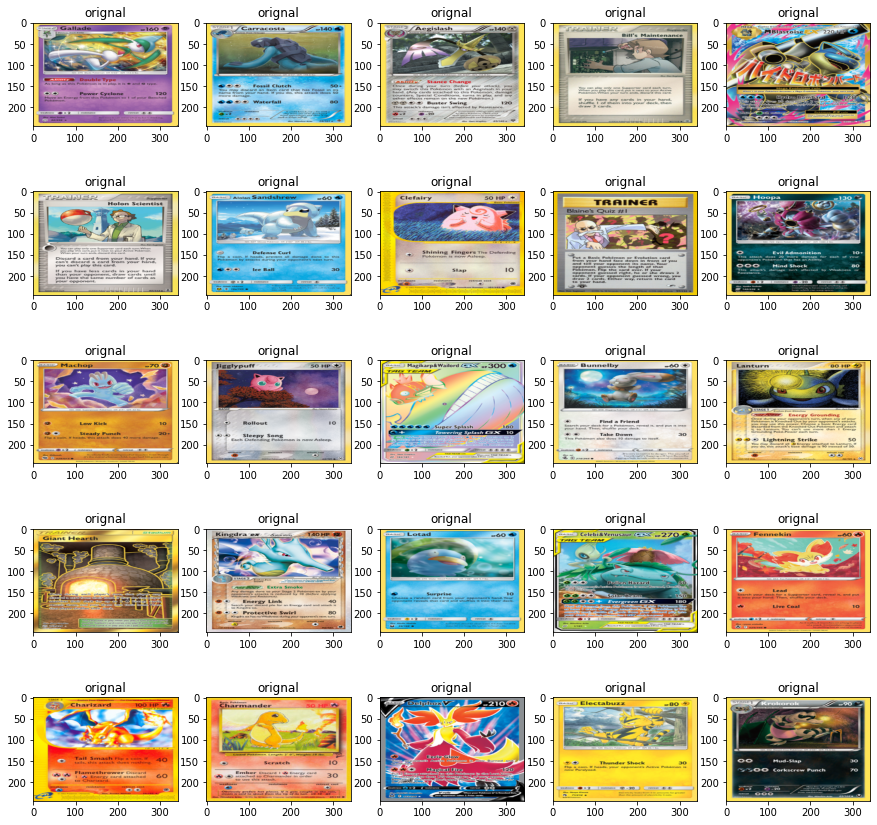

In [3]:
import numpy as np
import os
import skimage.io as io
import cv2
import matplotlib.pyplot as plt

data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = io.imread(img_path) 
        img_arr = img_arr.transpose((1, 0, 2))
        if not img.endswith('.jpg') and not img.endswith('.jpeg') and not img.endswith('.png'):
            # skip non-image files
            continue
        img_path = os.path.join(folder,img)
        try:
            img_arr = io.imread(img_path)
        except:
            # handle the case where the image cannot be read
            print(f"Error reading image file: {img_path}")
            continue
    
        try:
            img_arr = cv2.resize(img_arr, (342,245))
            #img_arr = img_arr[:, :, ::-1] # swap BGR to RGB
            img_arr = img_arr.astype(float)
            if len(img_arr.shape) == 2:
                img_arr = np.stack((img_arr,) * 3, axis=-1)
            if img_arr.shape[-1] == 4:
                img_arr = img_arr[..., :3]
            img_arr = img_arr / 255.0
            image = np.array(img_arr).flatten()
            data.append([image, label])      
        except Exception as e:
            pass
print(len(data))
# shuffle the data list
np.random.shuffle(data)

# plot the images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15,15))
for i, ax in enumerate(axes.flatten()):
    img = data[i][0].reshape(245, 342, 3) # reshape to the original image shape
    ax.imshow(img)
    ax.set_title(CATEGORIES[data[i][1]])
plt.show()
